Tutorial
================




Quickstart
-------------

Here is how to fit a simple likelihood function:

In [1]:
paramnames = ['Hinz', 'Kunz']

def loglike(z):
    return -0.5 * (((z - 0.5) / 0.01)**2).sum()

def transform(x):
    return 10. * x - 5.

from snowline import ReactiveImportanceSampler

sampler = ReactiveImportanceSampler(paramnames, loglike, transform)

sampler.run()

[snowline]     from: [0.56851572 0.54781278]


[snowline]     error: [0.04 0.04]


Maximum likelihood: L = -0.0 at:
    Hinz                0.5000 +- 0.0100
    Kunz                0.5000 +- 0.0100
[snowline] Initiating gaussian importance sampler


[snowline]     sampling 400 ...


[snowline]     sampling efficiency: 100.000%


[snowline] Optimizing proposal (from scratch) ...


[snowline]     running variational Bayes ...


[snowline]     reduced from 7 to 1 components


[snowline] Importance sampling 400 ...


[snowline] Likelihood function evaluations: 1252


[snowline] Status: Have 799 total effective samples, done.



logZ = -11.979 +- 0.001

    Hinz                0.500 +- 0.010
    Kunz                0.5002 +- 0.0099


This gave us error estimates and even logZ!

In [2]:
print("Loglikelihood was called %d times." % sampler.results['ncall'])

Loglikelihood was called 1252 times.


Visualisation
--------------------

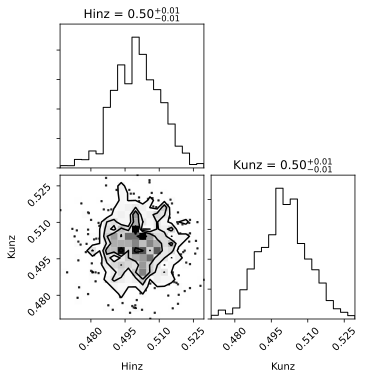

In [3]:
import corner
corner.corner(sampler.results['samples'], labels=paramnames, show_titles=True);

Advanced usage
-----------------------

Lets try a function that cannot be described by a simple gaussian.

In [4]:

paramnames = ['Hinz', 'Kunz'] #, 'Fuchs', 'Gans', 'Hofer']

def loglike_rosen(theta):
    a = theta[:-1]
    b = theta[1:]
    return -2 * (100 * (b - a**2)**2 + (1 - a)**2).sum()

def transform_rosen(u):
    return u * 20 - 10

sampler = ReactiveImportanceSampler(paramnames, loglike_rosen, transform=transform_rosen)
sampler.run(min_ess=1000, max_ncalls=1000000)


[snowline]     from: [0.54586516 0.54673075]


[snowline]     error: [0.04 0.04]


Maximum likelihood: L = -0.0 at:
    Hinz                1.00 +- 0.49
    Kunz                1.00 +- 0.99
[snowline] Initiating gaussian importance sampler


[snowline]     sampling 400 ...


[snowline]     sampling efficiency: 20.555%


[snowline] Optimizing proposal (from scratch) ...


[snowline]     running variational Bayes ...


[snowline]     reduced from 8 to 5 components


[snowline] Importance sampling 400 ...


[snowline] Likelihood function evaluations: 1284


[snowline] Status: Have 185 total effective samples, sampling 4914 next.


[snowline]     sampling efficiency: 23.200%


[snowline] Optimizing proposal (from previous) ...


[snowline]     running variational Bayes ...


[snowline]     reduced from 8 to 4 components


[snowline] Importance sampling 4914 ...


[snowline] Likelihood function evaluations: 6198


[snowline] Status: Have 111 total effective samples, sampling 63438 next.


[snowline]     sampling efficiency: 1.960%


[snowline] Optimizing proposal (from previous) ...


[snowline]     running variational Bayes ...


[snowline]     reduced from 8 to 3 components


[snowline] Importance sampling 63438 ...


[snowline] Likelihood function evaluations: 69636


[snowline] Status: Have 7101 total effective samples, done.



logZ = -8.123 +- 0.011

    Hinz                1.00 +- 0.31
    Kunz                1.10 +- 0.63


This already took quite a bit more effort.

In [5]:
print("Loglikelihood was called %d times." % sampler.results['ncall'])

Loglikelihood was called 69636 times.


Lets see how well it did:

In [6]:
from getdist import MCSamples, plots
import matplotlib.pyplot as plt

samples_g = MCSamples(samples=sampler.results['samples'],
                       names=sampler.results['paramnames'],
                       label='Gaussian',
                       settings=dict(smooth_scale_2D=3), sampler='nested')

mcsamples = [samples_g]


Removed no burn in


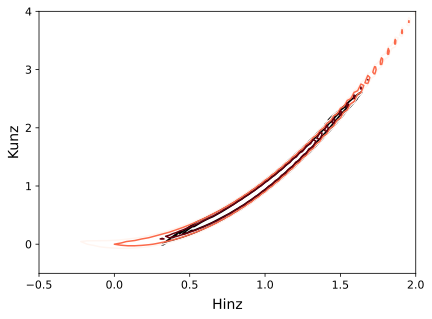

In [7]:
import numpy as np
x = np.linspace(-0.5, 4, 100)
a, b = np.meshgrid(x, x)
z = -2 * (100 * (b - a**2)**2 + (1 - a)**2)

g = plots.get_single_plotter()
g.plot_2d(mcsamples, paramnames)
plt.contour(a, b, z, [-3, -2, -1], cmap='Reds')
plt.xlim(-0.5, 2)
plt.ylim(-0.5, 4);

As you can see, the importance sampler was not able to perfectly follow the rosenbrock curvature. But it is a good start to roughly understand the uncertainties!

Removed no burn in


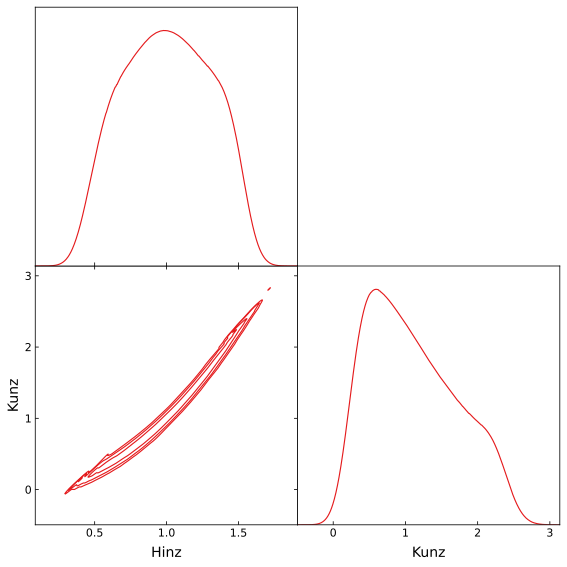

In [8]:
from getdist import MCSamples, plots
import matplotlib.pyplot as plt

samples_g = MCSamples(samples=sampler.results['samples'],
                       names=sampler.results['paramnames'],
                       label='Gaussian',
                       settings=dict(smooth_scale_2D=3), sampler='nested')

mcsamples = [samples_g]

g = plots.get_subplot_plotter(width_inch=8)
g.settings.num_plot_contours = 3
g.triangle_plot(mcsamples, filled=False, contour_colors=plt.cm.Set1.colors)

#corner.corner(sampler.results['samples'], labels=sampler.results['paramnames'], show_titles=True);